# Predictive Modeling of Drug Response

## Importing initial libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df=pd.read_csv("drug200.csv")

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## Data Preprocessing

In [4]:
df.shape

(200, 6)

In [5]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [6]:
df.tail()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
199,40,F,LOW,NORMAL,11.349,drugX


In [7]:
df.sample(7)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
41,58,F,HIGH,NORMAL,14.239,drugB
135,74,M,LOW,NORMAL,11.939,drugX
16,69,M,LOW,NORMAL,11.455,drugX
112,35,M,LOW,NORMAL,9.170,drugX
168,51,F,LOW,NORMAL,23.003,drugY
21,63,M,NORMAL,HIGH,25.917,drugY
37,39,M,LOW,NORMAL,13.938,drugX


In [8]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [9]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [10]:
df["Drug"].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

## Label Encoding

#### Using Label encoding to convert categorical values to numerical values.

In [8]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()

In [9]:
df["BP"]=label_encoder.fit_transform(df["BP"])

In [14]:
df["BP"].unique()

array([0, 1, 2])

In [10]:
df["Cholesterol"]=label_encoder.fit_transform(df["Cholesterol"])

In [15]:
df["Cholesterol"].unique()

array([0, 1])

In [11]:
df["Drug"]=label_encoder.fit_transform(df["Drug"])

In [13]:
df["Drug"].unique()

array([4, 2, 3, 0, 1])

In [12]:
df["Sex"]=label_encoder.fit_transform(df["Sex"])

In [16]:
df["Sex"].unique()

array([0, 1])

In [18]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
128,47,1,1,1,33.542,4
136,55,0,0,0,10.977,1
112,35,1,1,1,9.170,3
7,41,1,1,0,11.037,2
172,39,0,2,1,17.225,4
104,22,1,0,1,28.294,4
181,59,0,2,0,13.884,3
52,62,1,1,1,27.183,4
62,67,1,1,1,20.693,4
39,15,1,2,0,9.084,3


In [19]:
df.describe()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.315000,0.520000,0.910000,0.485000,16.084485,2.870000
std,16.544315,0.500854,0.821752,0.501029,7.223956,1.372047
min,15.000000,0.000000,0.000000,0.000000,6.269000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,10.445500,2.000000
50%,45.000000,1.000000,1.000000,0.000000,13.936500,3.000000
75%,58.000000,1.000000,2.000000,1.000000,19.380000,4.000000
max,74.000000,1.000000,2.000000,1.000000,38.247000,4.000000


<Axes: >

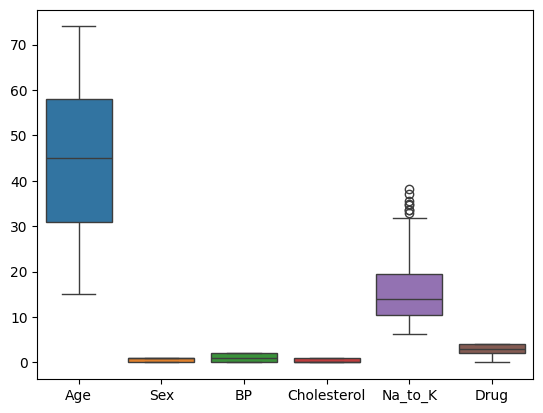

In [20]:
sns.boxplot(data=df)

<Axes: >

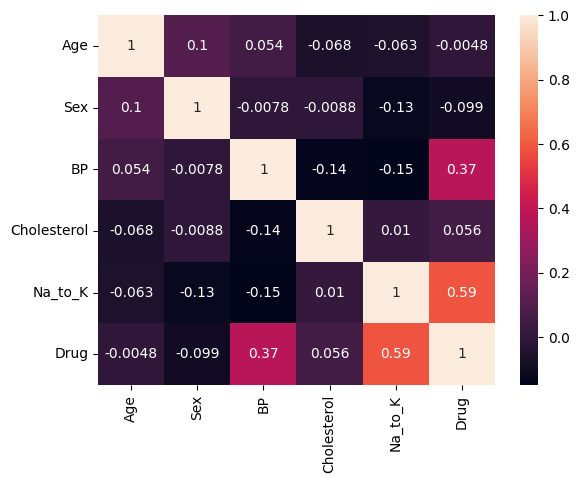

In [21]:
corr=df.select_dtypes("number").corr()
sns.heatmap(corr,annot=True)

## Train_Test Split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x=df.drop(columns=["Drug"])
y = df['Drug']

In [24]:
x, y = x.align(y, join='inner', axis=0)

In [25]:
train_x, test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

## Importing suitable algorithms 

#### 1. SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svc=SVC()

In [28]:
svc.fit(train_x,train_y)

SVC()

In [29]:
svc.score(test_x,test_y)*100

62.5

In [30]:
svc.predict(train_x)

array([3, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 3, 4,
       3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3,
       3, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 4, 4, 3,
       3, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 4, 3,
       3, 3, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 3])

In [31]:
input_data = [[47,1,1,0,13.093	]]
input_data = np.array(input_data)

##### Giving inputs for prediction

In [32]:
if input_data.ndim == 1:
    input_data = input_data.reshape(1, -1)
prediction = svc.predict(input_data)
if prediction[0]==0:
    prediction_result="drugA"
elif prediction[0]==1:
    prediction_result="drugB"
elif prediction[0]==2:
    prediction_result="drugC"
elif prediction[0]==3:
    prediction_result="drugX"
elif prediction[0]==4:
    prediction_result="drugY"
    
print(f"Prediction: {prediction_result}")

Prediction: drugX


##### Building a function for predicting drug

#### 2.Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
clf = DecisionTreeClassifier(random_state=0)

In [34]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(random_state=0)

In [35]:
clf.predict(train_x)

array([3, 3, 3, 4, 4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4, 0, 4,
       1, 4, 3, 4, 4, 4, 4, 1, 3, 3, 3, 1, 0, 3, 4, 3, 0, 3, 2, 4, 0, 0,
       0, 1, 1, 0, 4, 0, 4, 4, 0, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3, 4, 0,
       2, 4, 3, 3, 4, 4, 3, 3, 1, 4, 1, 3, 4, 4, 4, 1, 2, 0, 4, 4, 4, 0,
       3, 3, 4, 2, 4, 4, 3, 1, 3, 3, 4, 4, 4, 4, 4, 4, 1, 3, 2, 0, 4, 0,
       0, 3, 4, 4, 4, 4, 3, 4, 0, 3, 4, 4, 3, 4, 3, 1, 4, 4, 2, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 2])

In [36]:
clf.score(train_x,train_y)*100

100.0

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.68\nsamples = 160\nvalue = [17, 13, 11, 43, 76]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.656\nsamples = 84\nvalue = [17, 13, 11, 43, 0]'),
 Text(0.25, 0.5, 'x[0] <= 50.5\ngini = 0.491\nsamples = 30\nvalue = [17, 13, 0, 0, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [17, 0, 0, 0, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.324\nsamples = 54\nvalue = [0, 0, 11, 43, 0]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 11, 12, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 0, 31, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 76\nvalue = [0, 0, 0, 0, 76]')]

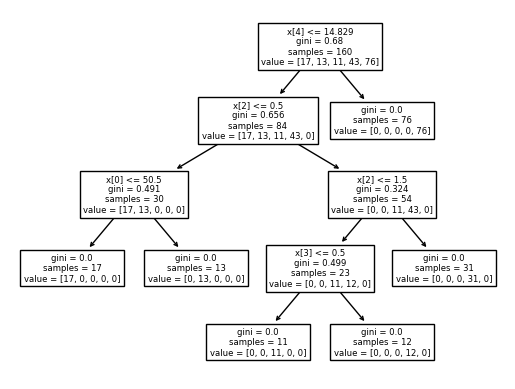

In [37]:
plot_tree(clf)

In [38]:
input_data = [[47,1,1,0,13.093]]
input_data = np.array(input_data)

In [39]:
if input_data.ndim == 1:
    input_data = input_data.reshape(1, -1)
prediction = clf.predict(input_data)
if prediction[0]==0:
    prediction_result="drugA"
elif prediction[0]==1:
    prediction_result="drugB"
elif prediction[0]==2:
    prediction_result="drugC"
elif prediction[0]==3:
    prediction_result="drugX"
elif prediction[0]==4:
    prediction_result="drugY"
    
print(f"Prediction: {prediction_result}")

Prediction: drugC


#### 3. Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf=RandomForestClassifier()

In [42]:
rf.fit(train_x,train_y)

RandomForestClassifier()

In [43]:
rf.predict(train_x)

array([3, 3, 3, 4, 4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4, 0, 4,
       1, 4, 3, 4, 4, 4, 4, 1, 3, 3, 3, 1, 0, 3, 4, 3, 0, 3, 2, 4, 0, 0,
       0, 1, 1, 0, 4, 0, 4, 4, 0, 4, 4, 4, 3, 4, 3, 4, 4, 3, 1, 3, 4, 0,
       2, 4, 3, 3, 4, 4, 3, 3, 1, 4, 1, 3, 4, 4, 4, 1, 2, 0, 4, 4, 4, 0,
       3, 3, 4, 2, 4, 4, 3, 1, 3, 3, 4, 4, 4, 4, 4, 4, 1, 3, 2, 0, 4, 0,
       0, 3, 4, 4, 4, 4, 3, 4, 0, 3, 4, 4, 3, 4, 3, 1, 4, 4, 2, 3, 4, 4,
       4, 4, 3, 4, 3, 3, 4, 2, 2, 4, 2, 4, 1, 3, 4, 3, 4, 4, 4, 3, 4, 4,
       4, 3, 3, 4, 4, 2])

In [44]:
rf.score(test_x,test_y)*100

100.0

In [45]:
input_data = [[72,1,0,1,9.677]]
input_data = np.array(input_data)

In [46]:
if input_data.ndim == 1:
    input_data = input_data.reshape(1, -1)
prediction = rf.predict(input_data)
if prediction[0]==0:
    prediction_result="drugA"
elif prediction[0]==1:
    prediction_result="drugB"
elif prediction[0]==2:
    prediction_result="drugC"
elif prediction[0]==3:
    prediction_result="drugX"
elif prediction[0]==4:
    prediction_result="drugY"
    
print(f"Prediction: {prediction_result}")

Prediction: drugB
